In [250]:
import pandas as pd
import numpy as np
import glob
import ast

import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
glob.glob('viz/*.csv')

['viz\\2018-09-12 - Consolidated Entity Data - Indonesia.csv',
 'viz\\2018-09-17 - Consolidated Entity Relationship Data - Indonesia.csv',
 'viz\\ctd-template.csv',
 'viz\\ctd-test.csv',
 'viz\\kumu - elements.csv',
 'viz\\kumu - relationships.csv']

In [95]:
df_rel = pd.read_csv('viz\\2018-09-17 - Consolidated Entity Relationship Data - Indonesia.csv')
df_el = pd.read_csv('viz\\2018-09-12 - Consolidated Entity Data - Indonesia.csv')

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,4,5,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34,35,36,37,39,40,44,45,46,47,48,51,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,94,95,96,97,98,99,100,101,102,105,106,107,108,109,110,112,113,114,115,116,117,119,120,121,122,123,124,125,126,127,128,142,143,145,146,147,148) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean relationships table

In [97]:
rel_rename = {
    'destination_entity_name': "To",
    'source_entity_name': "From",
    'relationship_type': "Type",
}

In [101]:
df_rel = df_rel.rename(columns=rel_rename)

In [104]:
df_rel = df_rel[['From', 'To', 'Type','entity_data_source',
       'source_entity_type',  'destination_entity_type']]

In [108]:
df_rel_shortlist = df_rel[(df_rel['To'].notnull()) & (df_rel['From'].notnull())].reset_index(drop=True)

In [129]:
df_rel_shortlist.to_csv('viz\\kumu - relationships.csv', index=False)

In [215]:
df_rel_shortlist.head()

,From,To,Type,entity_data_source,source_entity_type,destination_entity_type
0,Google Launchpad Accelerator,Google,is_subsidiary_of,Corporate Accelerators (accelerators),accelerator,company
1,A. Noor Arief,Dagadu,is_founder_of,"1000 Startup Digital (mentors, entrepreneurs)",founder,company
2,Abdi Karya,Rumata art space,is_founder_of,"1000 Startup Digital (mentors, entrepreneurs)",founder,company
3,Achmad Affandi,ITS,is_founder_of,"1000 Startup Digital (mentors, entrepreneurs)",founder,company
4,Achmad Rouzni Noor II,detikINET,is_founder_of,"1000 Startup Digital (mentors, entrepreneurs)",founder,company


## Clean elements table

In [265]:
df_from = df_rel_shortlist[['From','source_entity_type', 'entity_data_source']].rename(columns={'From':'Label', 'source_entity_type':'Type'})
df_to = df_rel_shortlist[['To','destination_entity_type', 'entity_data_source']].rename(columns={'To':'Label', 'destination_entity_type': 'Type'})

In [266]:
df_from.shape, df_to.shape

((3254, 3), (3254, 3))

In [267]:
df_rel_lookup = pd.concat([df_from,df_to]).drop_duplicates()

In [268]:
el_cols = ['Label', 'Type', 'entity_data_source']
df_el_shortlist = df_rel_lookup.merge(df_el, how='left', on=el_cols)

In [269]:
df_el_shortlist.shape, df_el_shortlist[df_el_shortlist['Label'].notnull()].reset_index(drop=True).shape

((3780, 149), (3780, 149))

In [270]:
df_el_shortlist = df_el_shortlist[df_el_shortlist['Label'].notnull()].reset_index(drop=True)

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,  12.,
          2.,   4.,   1.,   1.,   3., 115.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

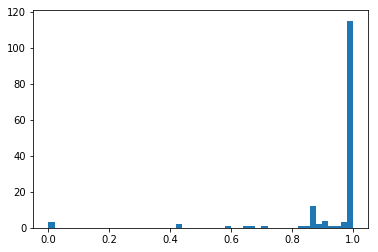

In [271]:
plt.hist(df_el_shortlist.isnull().mean(), bins=50)

In [272]:
# replace Industry list
df_el_shortlist['entity_industry_list'] = df_el_shortlist['entity_industry_list'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
df_el_shortlist['entity_industry_list'] = df_el_shortlist['entity_industry_list'].str.replace(', or ', '|').str.replace(' or ', '|').str.replace(' & ', '|').str.replace(', ','|')

In [273]:
# fill in NULL
df_el_shortlist['entity_address_fillna'] = df_el_shortlist['entity_address'].combine_first(df_el_shortlist['entity_address_country']).combine_first(df_el_shortlist['entity_founded_company_country'])
df_el_shortlist['entity_industry_fillna'] = df_el_shortlist['entity_industry'].combine_first(df_el_shortlist['entity_industry_list'])
df_el_shortlist['entity_desc_fillna'] = df_el_shortlist['entity_desc'].combine_first(df_el_shortlist['entity_industry_fillna'])
df_el_shortlist['entity_photo_fillna'] = df_el_shortlist['entity_photo_logo'].combine_first(df_el_shortlist['entity_photo'])

In [274]:
cols = df_el_shortlist.columns

In [275]:
for keyword in ['address', 'url', 'socmed', 'photo', 'industry','fillna', 'funding']:
    print(keyword)
    for col in cols:
        if keyword in col:
            if df_el_shortlist[col].notnull().sum() > 0:
                print(col, df_el_shortlist[col].notnull().sum())
    print()

address
entity_address 522
entity_address_city 516
entity_address_country 1553
entity_address_district 420
entity_address_district_postal_code 517
entity_address_province 516
entity_address_subdistrict 421
entity_address_fillna 2019

url
entity_dir_url 40
entity_url_articles 12
entity_url_dir 525
entity_url_website 1291

socmed
entity_socmed_facebook 63
entity_socmed_facebook_engagement 64
entity_socmed_facebook_fans 64
entity_socmed_instagram 30
entity_socmed_linkedin 50
entity_socmed_twitter 294
entity_socmed_twitter_engagement 64
entity_socmed_twitter_followers 64

photo
entity_photo 501
entity_photo_logo 1117
entity_photo_fillna 1618

industry
entity_industry 1215
entity_industry_description 1
entity_industry_list 76
entity_industry_naics 1
entity_industry_naics_code 1
entity_industry_naics_sector 1
entity_industry_subtype 26
entity_industry_fillna 1291

fillna
entity_address_fillna 2019
entity_industry_fillna 1291
entity_desc_fillna 1491
entity_photo_fillna 1618

funding
entity_fu

In [276]:
# remove columns with a lot of NULL values
null_threshold = 0.9
non_null_cols = df_el_shortlist.columns[df_el_shortlist.isnull().mean() < null_threshold]

# keep key columns
key_cols = ['entity_address',
            'entity_address_country',
            'entity_address_province',
            'entity_address_district',
            'entity_address_district_postal_code',
            'entity_address_subdistrict',
            'entity_address_city',
            'entity_url_website',
            'entity_socmed_facebook',
            'entity_socmed_twitter',
           'entity_socmed_instagram',
            'entity_socmed_linkedin',
           'entity_industry']

key_new_cols = [col for col in cols if 'fillna' in col]

keep_cols = sorted(list(set(non_null_cols) | set(key_cols) | set(key_new_cols)))

In [277]:
df_el_shortlistv2 = df_el_shortlist[keep_cols]

In [278]:
df_el_shortlistv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 33 columns):
Label                                  3780 non-null object
Type                                   3780 non-null object
entity_address                         522 non-null object
entity_address_city                    516 non-null object
entity_address_country                 1553 non-null object
entity_address_district                420 non-null object
entity_address_district_postal_code    517 non-null float64
entity_address_fillna                  2019 non-null object
entity_address_province                516 non-null object
entity_address_subdistrict             421 non-null object
entity_association_membership_type     517 non-null object
entity_contact_fax                     497 non-null object
entity_contact_phone                   516 non-null object
entity_data_date_scraped_datetime      2153 non-null object
entity_data_date_scraped_text          2153 non-null object
e

In [279]:
el_rename = {
    'entity_desc_fillna': 'Description',
    'entity_photo_fillna': 'Image'
}

In [280]:
df_el_shortlistv2 = df_el_shortlistv2.rename(columns=el_rename)

In [281]:
df_el_shortlistv2.shape

(3780, 33)

In [282]:
df_el_shortlistv2.to_csv('viz\\kumu - elements.csv', index=False)